In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Loading the training and testing datasets
train_data = pd.read_csv("../kaggle/input/train.csv")
test_data = pd.read_csv("../kaggle/input/test.csv")

In [3]:
# Display the first few rows of the training dataset
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Column headers in train_data but not in test_data
train_columns_not_in_test = train_data.columns.difference(test_data.columns)
print("Columns in train_data but not in test_data:", train_columns_not_in_test)

Columns in train_data but not in test_data: Index(['SalePrice'], dtype='object')


In [5]:
# Checking for missing values in the training dataset
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


## TODO: Figure out how to handle the missing values in each feature

In [6]:
# Displaying a statistical summary of the training dataset
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


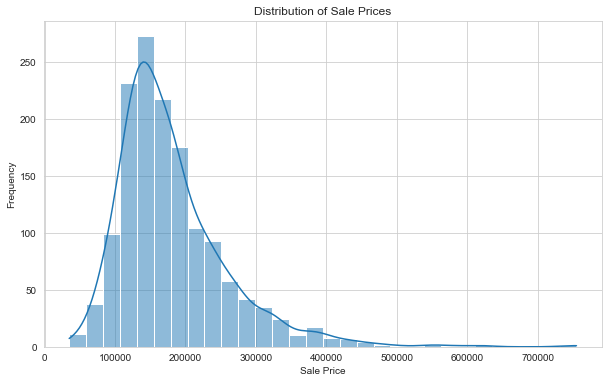

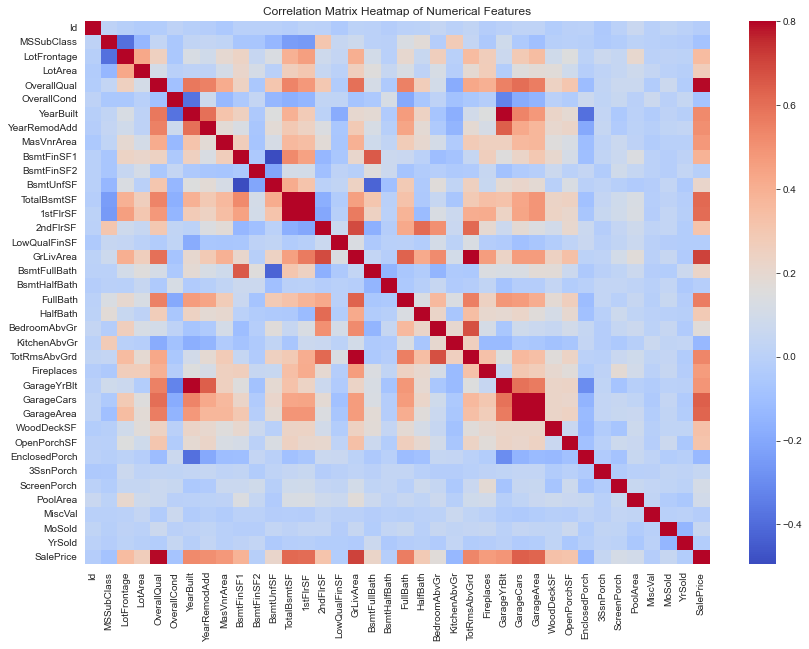

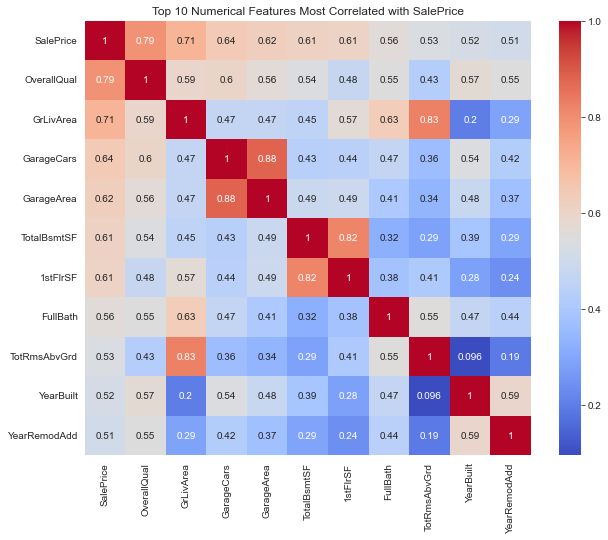

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for visualizations
sns.set_style("whitegrid")

# Histogram of SalePrice (target variable)
plt.figure(figsize=(10,6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# We'll exclude categorical columns for the correlation matrix
numerical_cols = train_data.select_dtypes(include=[np.number])

# Correlation matrix heatmap to see how features are correlated with SalePrice
corr_matrix = numerical_cols.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=0.8)
plt.title('Correlation Matrix Heatmap of Numerical Features')
plt.show()

# Displaying top 10 features most correlated with SalePrice
top_corr_features = corr_matrix["SalePrice"].sort_values(ascending=False)[:11].index
plt.figure(figsize=(10,8))
sns.heatmap(train_data[top_corr_features].corr(), annot=True, cmap="coolwarm")
plt.title('Top 10 Numerical Features Most Correlated with SalePrice')
plt.show()

**We are handling missing data by utilizing the category's mean**

*Let's try different imputers*

In [13]:
from sklearn.impute import SimpleImputer

In [29]:
# num_imputer = SimpleImputer(strategy="mean")
# Root Mean Squared Error (on logarithmic scale): 2.0801312818985984
# R-squared (R2) value: 0.6570

# num_imputer = SimpleImputer(strategy="median")
# Root Mean Squared Error (on logarithmic scale): 2.0801312818985984

num_imputer = SimpleImputer(strategy="constant", fill_value=100)


cat_imputer = SimpleImputer(strategy="constant", fill_value="blah")

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 1. Handle missing values

# Separate numerical and categorical columns
numerical_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_data.select_dtypes(exclude=[np.number]).columns.tolist()

# Exclude 'Id' and 'SalePrice' from the numerical columns list
numerical_cols.remove('Id')
if 'SalePrice' in numerical_cols:
    numerical_cols.remove('SalePrice')

# Impute missing values in numerical columns with the mean

train_data[numerical_cols] = num_imputer.fit_transform(train_data[numerical_cols])

# Impute missing values in categorical columns with the most frequent value
if categorical_cols:
    
    train_data[categorical_cols] = cat_imputer.fit_transform(train_data[categorical_cols])

    # 2. One-hot encode categorical columns
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_cols = pd.DataFrame(encoder.fit_transform(train_data[categorical_cols]))
    encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

    # Replace old categorical columns with new encoded columns
    train_data = train_data.drop(columns=categorical_cols)
    train_data = pd.concat([train_data, encoded_cols], axis=1)

# Splitting data into features and target variable
X = train_data.drop(columns=['Id', 'SalePrice'])
y = train_data['SalePrice']

# Splitting train_data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 4. Predict SalePrice on validation data
y_pred = regressor.predict(X_val)

# Ensure there are no zero or negative values in y_val and y_pred
y_val_pos = np.clip(y_val, a_min=1e-10, a_max=None)
y_pred_pos = np.clip(y_pred, a_min=1e-10, a_max=None)

# Compute RMSE on the logarithmic scale
rmse = np.sqrt(mean_squared_error(np.log(y_val_pos), np.log(y_pred_pos)))

print(f"Root Mean Squared Error (on logarithmic scale): {rmse}")



Root Mean Squared Error (on logarithmic scale): 2.0801312818985984


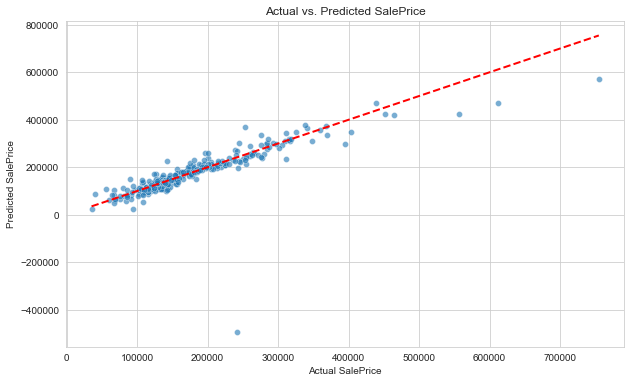

In [9]:
# Setting the style for the visualizations
sns.set_style("whitegrid")

# 1. Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--', lw=2, color='red')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice')
plt.show()

## RMSE confused me.  What is the R2 value? 

In [20]:
from sklearn.metrics import r2_score

# Predicting SalePrice on validation data
y_pred = regressor.predict(X_val)

# Calculate the R^2 value
r2 = r2_score(y_val, y_pred)

print(f"R-squared (R2) value: {r2:.4f}")

R-squared (R2) value: 0.6570


A baseline "naive" model that predicts the mean or median of the training data is straightforward to implement.

In [11]:
# Using the mean as the prediction
mean_value = y_train.mean()

# Predicting with the mean value for all entries in the validation set
y_pred_mean = [mean_value] * len(y_val)

# Calculating RMSE for the naive model using mean
rmse_mean = np.sqrt(mean_squared_error(y_val, y_pred_mean))

# Using the median as the prediction
median_value = y_train.median()

# Predicting with the median value for all entries in the validation set
y_pred_median = [median_value] * len(y_val)

# Calculating RMSE for the naive model using median
rmse_median = np.sqrt(mean_squared_error(y_val, y_pred_median))

print(f"RMSE for naive model using mean: {rmse_mean:.4f}")
print(f"RMSE for naive model using median: {rmse_median:.4f}")

RMSE for naive model using mean: 87619.0345
RMSE for naive model using median: 88667.1675
